# Zahrah Mahfuzah - 2106704004

# Nomor 1

Welcome to this program!


Masukkan list titik-titik berurutan:  [1,2,3,5,6,7]
Masukkan list nilai fungsi di titik-titik tersebut:  [9,96,423,2925,5904,10731]
Masukkan nilai x yang akan diaproksimasikan nilai fungsinya:  4
Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD):  1


Polinomial Lagrange =  x**2*(4*x**2 + 3*x + 2)
Aproksimasi nilai fungsi di x = 4 menggunakan Lagrange adalah y= 1248.00000


Tunjukkan ((1)tabel, (2)plot) :  1


+-----+---------------+
|  x  |       y       |
|-----+---------------|
|  1  |   9.0000000   |
|  2  |  96.0000000   |
|  3  |  423.0000000  |
|  4  | 1248.0000000  |
|  5  | 2925.0000000  |
|  6  | 5904.0000000  |
|  7  | 10731.0000000 |
+-----+---------------+


Ingin mencoba lagi? (Y/N)  Y
Masukkan list titik-titik berurutan:  [1,2,3,5,6,7]
Masukkan list nilai fungsi di titik-titik tersebut:  [9,96,423,2925,5904,10731]
Masukkan nilai x yang akan diaproksimasikan nilai fungsinya:  4
Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD):  2
(1)Forward, (2)Backward:  1
Ingin mencetak tabel DD? (Y/N):  Y


|   x |     y |   DD1 |   DD2 |   DD3 |   DD4 |   DD5 |
|-----+-------+-------+-------+-------+-------+-------|
|   1 |     9 |    87 |   120 |    47 |     4 |     0 |
|   2 |    96 |   327 |   308 |    67 |     4 |       |
|   3 |   423 |  1251 |   576 |    87 |       |       |
|   5 |  2925 |  2979 |   924 |       |       |       |
|   6 |  5904 |  4827 |       |       |       |       |
|   7 | 10731 |       |       |       |       |       |
NDD Polinomial =  x**2*(4.0*x**2 + 3.0*x + 2.0)
Aproksimasi nilai fungsi di x = 4 dengan menggunakan metode interpolasi forward NDD adalah y = 1248.0000000


Tunjukkan ((1)tabel, (2)plot) :  2


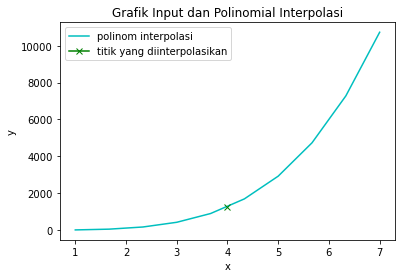

Ingin mencoba lagi? (Y/N)  N


Thankyou for running this program!


In [7]:
print('Welcome to this program!')

# import module 
import numpy as np 
import matplotlib.pyplot as plt 
from tabulate import tabulate 
from sympy import *

# definisi
def Lagrange(x_points,y_points,X): # pendefinisian fungsi lagrange
    pol = 0 # inisiasi nilai polinom
    n = len(x_points)
    for k in range(n):
        L = 1 # inisiasi nilai L(n.k)
        for i in range(n):
            if i!= k: 
                L *= ((X-x_points[i])/(x_points[k]-x_points[i])) # mencari nilai L(n,k), tanda bintang untuk selalu mengalikan nilai yang baru
        pol += y_points[k]*L # untuk mencari nilai aproksimasi dengan polinom 
    return pol

def DDTableGenerator(x_points,y_points): # fungsi untuk membuat tabel DD
    DDTable = [y_points] # kolom-kolom pada tabel
    for column in range(1,len(y_points)):
        DDcolumn = [] # isi setiap kolom 
        for row in range(len(DDTable[-1])-1): # proses mengisi kolom
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) # tambahkan kolom yang diisi ke tabel
    return DDTable

def ForwardDD(x_points,y_points,X): # fungsi dengan metode Forward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] # inisiasi nilai dari polinom
    mult_term = 1 # variabel penyimpanan (x-x0)(x-x)...
    for k in range(1,len(DDTable)):
        mult_term *= (X-x_points[k-1]) # menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol +=DDTable[k][0]*mult_term # menghitung nilai interpolasi
    return pol

def BackwardDD(x_points,y_points,X): # fungsi dengan metode Backward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] # inisiasi nilai dari polinom
    mult_term = 1 # variabel untuk menyimpan nilai dari (x-xn)(x-x)
    for k in range(1,len(DDTable)):
        mult_term *= (X-x_points[-k]) # menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term # menghitung nilai interpolasi
    return pol

bisa = True
while bisa == True: # iterasi terus berlangsung
    titik_x = eval(input("Masukkan list titik-titik berurutan: ")) # input list titik-titik (x)
    titik_y = eval(input("Masukkan list nilai fungsi di titik-titik tersebut: ")) # input nilainya (y)
    eval_x = eval(input("Masukkan nilai x yang akan diaproksimasikan nilai fungsinya: ")) # input titik yang ingin dihitung nilai interpolasinya
    pilihan = int(input("Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD): ")) # input pilihan metode interpolasi

    if pilihan == 1: # jika memilih metode Lagrange
        x = Symbol('x') # supaya di program tetap dalam variabel 'x'
        print("Polinomial Lagrange = ", simplify(Lagrange(titik_x,titik_y,x)))
        print("Aproksimasi nilai fungsi di x = {0} menggunakan Lagrange adalah y= {1:.5f}".format(eval_x,Lagrange(titik_x,titik_y,eval_x)))
    
    elif pilihan == 2: # jika memilih metode NDD
        x = Symbol('x') # supaya di program tetap dalam variabel 'x'
        pilih = int(input("(1)Forward, (2)Backward: ")) # input pilihan NDD
        viewtable = input("Ingin mencetak tabel DD? (Y/N): ") # input ingin menampilkan tabel atau tidak
        if viewtable == 'Y': # jika ingin menampilkan tabel
            h = ['x','y'] # headers
            for i in range(1,len(titik_x)):
                h.append("DD"+str(i)) # penamaan headers di samping x dan y : DD1, DD2, dst. 
            t = []
            table = DDTableGenerator(titik_x,titik_y) # tabel DD
            for i in range(len(titik_x)):
                DDrow = [] # isi baris
                DDrow.append(titik_x[i])
                for j in range(len(titik_x)-i): # proses mengisi baris
                    DDrow.append(table[j][i])
                t.append(DDrow) # tambahkan baris pada tabel DD
            print(tabulate(t, headers = h, tablefmt = "orgtbl")) # referensi : modul 1
        if pilih == 1: # jika memilih forward NDD
            print("NDD Polinomial = ", simplify(ForwardDD(titik_x,titik_y,x)))
            print("Aproksimasi nilai fungsi di x = {0} dengan menggunakan metode interpolasi forward NDD adalah y = {1:.7f}".format(eval_x,ForwardDD(titik_x,titik_y,eval_x)))
        elif pilih == 2: # jika memilih backward NDD
            print("NDD polinomial = ", simplify(BackwardDD(titik_x,titik_y,x)))
            print("Aproksimasi nilai fungsi di x = {0} menggunakan Forward NDD adalah y = {1:.5f}".format(eval_x,BackwardDD(titik_x,titik_y,eval_x)))
  
    pilihLagi = int(input("Tunjukkan ((1)tabel, (2)plot) : ")) # input memilih tabel / plot hasil interpolasi
    if pilihLagi == 1: # jika memilih tabel
        t2 = []
        if pilihan == 1:
            pol = Lagrange(titik_x,titik_y,eval_x) # tabel dari hasil Lagrange
        if pilihan == 2:
            if pilih == 1:
                pol = ForwardDD(titik_x,titik_y,eval_x) # tabel dari hasil Forward NDD
            elif pilih == 2:
                pol = BackwardDD(titik_x,titik_y,eval_x) # tabel dari hasil Backward NDD
        titik_x.append(eval_x) # aproksimasi nilai x
        titik_y.append(pol) # hasil
        urut = sorted(titik_x) # sesuai urutan
        for i in range(len(titik_x)):
            for j in range(len(titik_y)):
                if urut[i] == titik_x[j]:
                    t2.append([urut[i], titik_y[j]])
        print(tabulate(t2, headers = ["x","y"], tablefmt = "psql", numalign = "center", stralign = "center", floatfmt = ".7f")) # referensi pqsl : internet
    elif pilihLagi == 2: # jika memilih plot
        if pilihan == 1:
            pers = str(Lagrange(titik_x,titik_y,x)) # plot persamaan Lagrange
        if pilihan == 2:
            if pilih == 1:
                pers = str(ForwardDD(titik_x,titik_y,x)) # plot persamaan Forward NDD
            if pilih == 2:
                pers = str(BackwardDD(titik_x,titik_y,x)) # plot persamaan Backward NDD
    
        def g(x): # persamaan g(x)
            return eval(pers)

        x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # titik x
        y1 = g(x1) # nilai persamaan x
        x3 = eval_x # titik yang diinterpolasikan
        y3 = g(x3) # nilai titik yang diinterpolasikan
        plt.plot(x1,y1,'c') # coral
        plt.plot(x3,y3,'g-x') # bentuk x
        plt.ylabel('y')
        plt.xlabel('x')
        plt.title("Grafik Input dan Polinomial Interpolasi") # judul
        plt.legend(["polinom interpolasi","titik yang diinterpolasikan"]) # legend atau keterangan mengenai plot
        plt.show() # print plot

    ngulang = str(input("Ingin mencoba lagi? (Y/N) ")) # untuk input ingin mengulang program atau tidak
    if ngulang == "N":
        print("Thankyou for running this program!") 
        bisa = False # selesai ketika kondisi ini

# Nomor 2

Welcome to this program!


Masukkan list titik-titik berurutan:  [35,45,55,65,85,95]
Masukkan list nilai fungsi di titik-titik tersebut:  [32,56,51,42,30,25]
Masukkan nilai x yang akan diaproksimasikan nilai fungsinya:  60
Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD):  1


Polinomial Lagrange =  x**5/1200000 - 367*x**4/1200000 + 1063*x**3/24000 - 15149*x**2/4800 + 70203*x/640 - 911941/640
Aproksimasi nilai fungsi di x = 60 menggunakan Lagrange adalah y= 46.27344


Tunjukkan ((1)tabel, (2)plot) :  1


+-----+------------+
|  x  |     y      |
|-----+------------|
| 35  | 32.0000000 |
| 45  | 56.0000000 |
| 55  | 51.0000000 |
| 60  | 46.2734375 |
| 65  | 42.0000000 |
| 85  | 30.0000000 |
| 95  | 25.0000000 |
+-----+------------+


Ingin mencoba lagi? (Y/N)  Y
Masukkan list titik-titik berurutan:  [35,45,55,65,85,95]
Masukkan list nilai fungsi di titik-titik tersebut:  [32,56,51,42,30,25]
Masukkan nilai x yang akan diaproksimasikan nilai fungsinya:  60
Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD):  2
(1)Forward, (2)Backward:  1
Ingin mencetak tabel DD? (Y/N):  Y


|   x |   y |   DD1 |         DD2 |          DD3 |          DD4 |         DD5 |
|-----+-----+-------+-------------+--------------+--------------+-------------|
|  35 |  32 |   2.4 | -0.145      |  0.00416667  | -6.83333e-05 | 8.33333e-07 |
|  45 |  56 |  -0.5 | -0.02       |  0.00075     | -1.83333e-05 |             |
|  55 |  51 |  -0.9 |  0.01       | -0.000166667 |              |             |
|  65 |  42 |  -0.6 |  0.00333333 |              |              |             |
|  85 |  30 |  -0.5 |             |              |              |             |
|  95 |  25 |       |             |              |              |             |
NDD Polinomial =  8.33333333333333e-7*x**5 - 0.000305833333333333*x**4 + 0.0442916666666667*x**3 - 3.15604166666667*x**2 + 109.6921875*x - 1424.9078125
Aproksimasi nilai fungsi di x = 60 dengan menggunakan metode interpolasi forward NDD adalah y = 46.2734375


Tunjukkan ((1)tabel, (2)plot) :  2


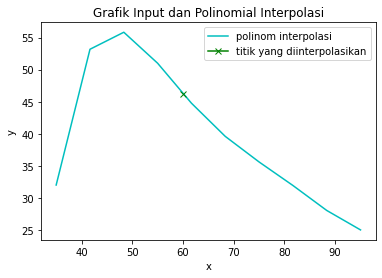

Ingin mencoba lagi? (Y/N)  Y
Masukkan list titik-titik berurutan:  [35,45,55,65,85,95]
Masukkan list nilai fungsi di titik-titik tersebut:  [32,56,51,42,30,25]
Masukkan nilai x yang akan diaproksimasikan nilai fungsinya:  60
Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD):  2
(1)Forward, (2)Backward:  2
Ingin mencetak tabel DD? (Y/N):  Y


|   x |   y |   DD1 |         DD2 |          DD3 |          DD4 |         DD5 |
|-----+-----+-------+-------------+--------------+--------------+-------------|
|  35 |  32 |   2.4 | -0.145      |  0.00416667  | -6.83333e-05 | 8.33333e-07 |
|  45 |  56 |  -0.5 | -0.02       |  0.00075     | -1.83333e-05 |             |
|  55 |  51 |  -0.9 |  0.01       | -0.000166667 |              |             |
|  65 |  42 |  -0.6 |  0.00333333 |              |              |             |
|  85 |  30 |  -0.5 |             |              |              |             |
|  95 |  25 |       |             |              |              |             |
NDD polinomial =  8.33333333333333e-7*x**5 - 0.000305833333333333*x**4 + 0.0442916666666667*x**3 - 3.15604166666667*x**2 + 109.6921875*x - 1424.9078125
Aproksimasi nilai fungsi di x = 60 menggunakan Forward NDD adalah y = 46.27344


Tunjukkan ((1)tabel, (2)plot) :  2


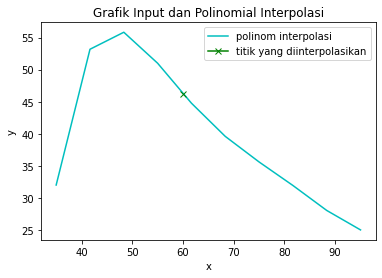

Ingin mencoba lagi? (Y/N)  N


Thankyou for running this program!


In [10]:
print('Welcome to this program!')

# import module 
import numpy as np 
import matplotlib.pyplot as plt 
from tabulate import tabulate 
from sympy import *

# definisi
def Lagrange(x_points,y_points,X): # pendefinisian fungsi lagrange
    pol = 0 # inisiasi nilai polinom
    n = len(x_points)
    for k in range(n):
        L = 1 # inisiasi nilai L(n.k)
        for i in range(n):
            if i!= k: 
                L *= ((X-x_points[i])/(x_points[k]-x_points[i])) # mencari nilai L(n,k), tanda bintang untuk selalu mengalikan nilai yang baru
        pol += y_points[k]*L # untuk mencari nilai aproksimasi dengan polinom 
    return pol

def DDTableGenerator(x_points,y_points): # fungsi untuk membuat tabel DD
    DDTable = [y_points] # kolom-kolom pada tabel
    for column in range(1,len(y_points)):
        DDcolumn = [] # isi setiap kolom 
        for row in range(len(DDTable[-1])-1): # proses mengisi kolom
            DD = (DDTable[-1][row+1]-DDTable[-1][row])\
            /(x_points[column+row]-x_points[row])
            DDcolumn.append(DD)
        DDTable.append(DDcolumn) # tambahkan kolom yang diisi ke tabel
    return DDTable

def ForwardDD(x_points,y_points,X): # fungsi dengan metode Forward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][0] # inisiasi nilai dari polinom
    mult_term = 1 # variabel penyimpanan (x-x0)(x-x)...
    for k in range(1,len(DDTable)):
        mult_term *= (X-x_points[k-1]) # menghitung (x-x0)(x-x1)...(x-x(n-1))
        pol +=DDTable[k][0]*mult_term # menghitung nilai interpolasi
    return pol

def BackwardDD(x_points,y_points,X): # fungsi dengan metode Backward NDD
    DDTable = DDTableGenerator(x_points,y_points)
    pol = DDTable[0][-1] # inisiasi nilai dari polinom
    mult_term = 1 # variabel untuk menyimpan nilai dari (x-xn)(x-x)
    for k in range(1,len(DDTable)):
        mult_term *= (X-x_points[-k]) # menghitung (x-xn)(x-x(n-1))...(x-x1)
        pol += DDTable[k][-1]*mult_term # menghitung nilai interpolasi
    return pol

bisa = True
while bisa == True: # iterasi terus berlangsung
    titik_x = eval(input("Masukkan list titik-titik berurutan: ")) # input list titik-titik (x)
    titik_y = eval(input("Masukkan list nilai fungsi di titik-titik tersebut: ")) # input nilainya (y)
    eval_x = eval(input("Masukkan nilai x yang akan diaproksimasikan nilai fungsinya: ")) # input titik yang ingin dihitung nilai interpolasinya
    pilihan = int(input("Masukkan metode yang ingin digunakan ((1)Lagrange , (2)NDD): ")) # input pilihan metode interpolasi

    if pilihan == 1: # jika memilih metode Lagrange
        x = Symbol('x') # supaya di program tetap dalam variabel 'x'
        print("Polinomial Lagrange = ", simplify(Lagrange(titik_x,titik_y,x)))
        print("Aproksimasi nilai fungsi di x = {0} menggunakan Lagrange adalah y= {1:.5f}".format(eval_x,Lagrange(titik_x,titik_y,eval_x)))
    
    elif pilihan == 2: # jika memilih metode NDD
        x = Symbol('x') # supaya di program tetap dalam variabel 'x'
        pilih = int(input("(1)Forward, (2)Backward: ")) # input pilihan NDD
        viewtable = input("Ingin mencetak tabel DD? (Y/N): ") # input ingin menampilkan tabel atau tidak
        if viewtable == 'Y': # jika ingin menampilkan tabel
            h = ['x','y'] # headers
            for i in range(1,len(titik_x)):
                h.append("DD"+str(i)) # penamaan headers di samping x dan y : DD1, DD2, dst. 
            t = []
            table = DDTableGenerator(titik_x,titik_y) # tabel DD
            for i in range(len(titik_x)):
                DDrow = [] # isi baris
                DDrow.append(titik_x[i])
                for j in range(len(titik_x)-i): # proses mengisi baris
                    DDrow.append(table[j][i])
                t.append(DDrow) # tambahkan baris pada tabel DD
            print(tabulate(t, headers = h, tablefmt = "orgtbl")) # referensi : modul 1
        if pilih == 1: # jika memilih forward NDD
            print("NDD Polinomial = ", simplify(ForwardDD(titik_x,titik_y,x)))
            print("Aproksimasi nilai fungsi di x = {0} dengan menggunakan metode interpolasi forward NDD adalah y = {1:.7f}".format(eval_x,ForwardDD(titik_x,titik_y,eval_x)))
        elif pilih == 2: # jika memilih backward NDD
            print("NDD polinomial = ", simplify(BackwardDD(titik_x,titik_y,x)))
            print("Aproksimasi nilai fungsi di x = {0} menggunakan Forward NDD adalah y = {1:.5f}".format(eval_x,BackwardDD(titik_x,titik_y,eval_x)))
  
    pilihLagi = int(input("Tunjukkan ((1)tabel, (2)plot) : ")) # input memilih tabel / plot hasil interpolasi
    if pilihLagi == 1: # jika memilih tabel
        t2 = []
        if pilihan == 1:
            pol = Lagrange(titik_x,titik_y,eval_x) # tabel dari hasil Lagrange
        if pilihan == 2:
            if pilih == 1:
                pol = ForwardDD(titik_x,titik_y,eval_x) # tabel dari hasil Forward NDD
            elif pilih == 2:
                pol = BackwardDD(titik_x,titik_y,eval_x) # tabel dari hasil Backward NDD
        titik_x.append(eval_x) # aproksimasi nilai x
        titik_y.append(pol) # hasil
        urut = sorted(titik_x) # sesuai urutan
        for i in range(len(titik_x)):
            for j in range(len(titik_y)):
                if urut[i] == titik_x[j]:
                    t2.append([urut[i], titik_y[j]])
        print(tabulate(t2, headers = ["x","y"], tablefmt = "psql", numalign = "center", stralign = "center", floatfmt = ".7f")) # referensi pqsl : internet
    elif pilihLagi == 2: # jika memilih plot
        if pilihan == 1:
            pers = str(Lagrange(titik_x,titik_y,x)) # plot persamaan Lagrange
        if pilihan == 2:
            if pilih == 1:
                pers = str(ForwardDD(titik_x,titik_y,x)) # plot persamaan Forward NDD
            if pilih == 2:
                pers = str(BackwardDD(titik_x,titik_y,x)) # plot persamaan Backward NDD
    
        def g(x): # persamaan g(x)
            return eval(pers)

        x1 = np.linspace(titik_x[0],titik_x[len(titik_x)-1],10) # titik x
        y1 = g(x1) # nilai persamaan x
        x3 = eval_x # titik yang diinterpolasikan
        y3 = g(x3) # nilai titik yang diinterpolasikan
        plt.plot(x1,y1,'c') # coral
        plt.plot(x3,y3,'g-x') # bentuk x
        plt.ylabel('y')
        plt.xlabel('x')
        plt.title("Grafik Input dan Polinomial Interpolasi") # judul
        plt.legend(["polinom interpolasi","titik yang diinterpolasikan"]) # legend atau keterangan mengenai plot
        plt.show() # print plot

    ngulang = str(input("Ingin mencoba lagi? (Y/N) ")) # untuk input ingin mengulang program atau tidak
    if ngulang == "N":
        print("Thankyou for running this program!") 
        bisa = False # selesai ketika kondisi ini

**Kesimpulan:**
    
Hasil output dari ketiga metode yang tersedia, yaitu Lagrange, Forward NDD, dan Backward NDD bernilai sama dengan nilai -18.6827641. Maka dari itu, dapat disimpulkan ketiga metode ini memberikan hasil yang cukup akurat pada kasus ini karena bernilai sama.